# Horse-Colic Dataset from UCI Machine Learning Repository

<span style="color:black; font-size:17px;">The dataset has 23 features and has a good mix of categorical and continuous features. It has a large number of features and instances with missing values, therefore understanding methods to replace these missing values and using it in modeling is made more practical in this treatment. Huge fraction of missing data (30%) is in fact a notable feature of this dataset.<br>
The data consists of attributes that are continuous, as well as categorical in type. 

<span style="color:black; font-size:20px;">CREDIT:</span><br>
<span style="color:red; font-size:20px;">
I would like to thank the University College of London (UCL) for making the dataset publicly available as well as Chandraraj Singh for working on it and giving other Kaggle users, such as myself an opportunity to learn!
    
<span style="color:black; font-size:17px;">In the following code we clean the dataset by bringing it from 30% to 0% `Null` capacity.
    
</span>


## Importing data 

In [1]:
import missingno as msno
import pandas as pd
columns = ['surgery','Age','Hospital ID','rectal temperature','pulse','respiratory rate','temperature of extremities','peripheral pulse',"mucous membranes",'capillary refill time','pain','peristalsis','abdominal distension','nasogastric tube','nasogastric reflux','nasogastric reflux PH','rectal examination - feces','abdomen',' packed cell volume','total protein','abdominocentesis appearance','abdomcentesis total protein','outcome','surgical lesion?','1','2','3','path']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data', sep = ' ', header = None, na_values='?', names = columns)


## Dataset Overview

In [2]:
df

,surgery,Age,Hospital ID,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,1,2,3,path
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   surgery                      299 non-null    float64
 1   Age                          300 non-null    int64  
 2   Hospital ID                  300 non-null    int64  
 3   rectal temperature           240 non-null    float64
 4   pulse                        276 non-null    float64
 5   respiratory rate             242 non-null    float64
 6   temperature of extremities   244 non-null    float64
 7   peripheral pulse             231 non-null    float64
 8   mucous membranes             253 non-null    float64
 9   capillary refill time        268 non-null    float64
 10  pain                         245 non-null    float64
 11  peristalsis                  256 non-null    float64
 12  abdominal distension         244 non-null    float64
 13  nasogastric tube    

<AxesSubplot:>

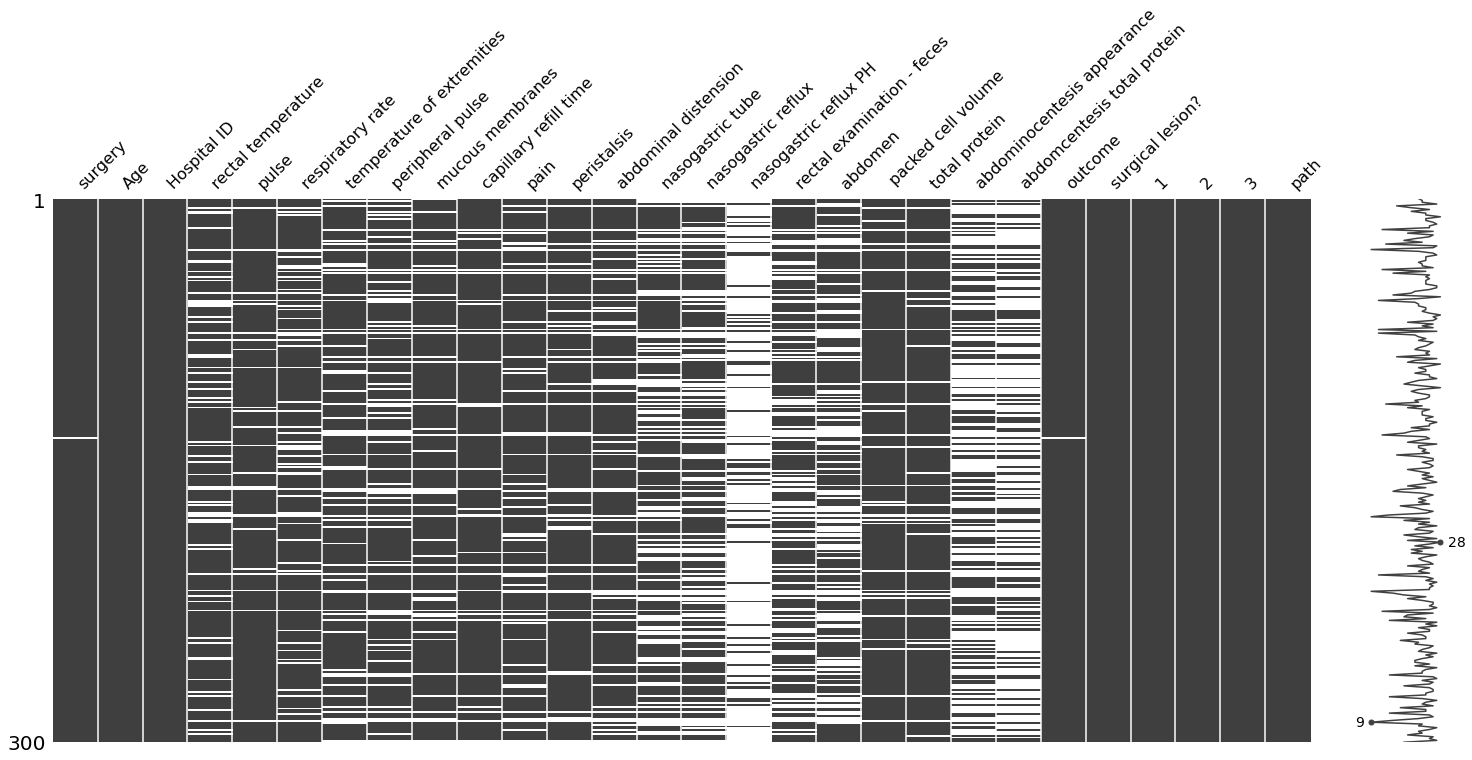

In [4]:
# Visual of Null values
msno.matrix(df)

In [5]:
df.describe()

,surgery,Age,Hospital ID,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,1,2,3,path
count,299.000000,300.000000,3.000000e+02,240.000000,276.000000,242.000000,244.000000,231.000000,253.000000,268.000000,...,271.000000,267.000000,135.000000,102.000000,299.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.397993,1.640000,1.085889e+06,38.167917,71.913043,30.417355,2.348361,2.017316,2.853755,1.305970,...,46.295203,24.456929,2.037037,3.019608,1.551839,1.363333,3657.880000,90.226667,7.363333,1.670000
std,0.490305,2.173972,1.529801e+06,0.732289,28.630557,17.642231,1.045054,1.042428,1.620294,0.477629,...,10.419335,27.475009,0.804905,1.968567,0.737187,0.481763,5399.513513,649.569234,127.536674,0.470998
min,1.000000,1.000000,5.184760e+05,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000,1.000000,...,23.000000,3.300000,1.000000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,5.289040e+05,37.800000,48.000000,18.500000,1.000000,1.000000,1.000000,1.000000,...,38.000000,6.500000,1.000000,2.000000,1.000000,1.000000,2111.750000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,5.303055e+05,38.200000,64.000000,24.500000,3.000000,2.000000,3.000000,1.000000,...,45.000000,7.500000,2.000000,2.250000,1.000000,1.000000,2673.500000,0.000000,0.000000,2.000000
75%,2.000000,1.000000,5.347275e+05,38.500000,88.000000,36.000000,3.000000,3.000000,4.000000,2.000000,...,52.000000,57.000000,3.000000,3.900000,2.000000,2.000000,3209.000000,0.000000,0.000000,2.000000
max,2.000000,9.000000,5.305629e+06,40.800000,184.000000,96.000000,4.000000,4.000000,6.000000,3.000000,...,75.000000,89.000000,3.000000,10.100000,3.000000,2.000000,41110.000000,7111.000000,2209.000000,2.000000


## Cleaning up

* According to the description of the data, `Age` can only take values of '1' and '2' . The `max` value appears to be '9' meaning that there are errors in that column. We shall **replace '9' occurences** with the dominant number, '1' .<br><br>
* We will also **drop the columns** where there is a large number of `Null` values.

In [6]:
# replace '9' occurences with the dominant number, '1'
df['Age'].replace({9:2}, inplace = True)

# drop the columns where there is a large number of Null values
df.drop('nasogastric reflux PH', axis=1, inplace = True)
df.drop('abdomcentesis total protein', axis=1, inplace = True)
df.drop('abdominocentesis appearance', axis=1, inplace = True)
df.drop('nasogastric tube', axis=1, inplace = True)
df.drop('abdomen', axis=1, inplace = True)
df.drop('rectal examination - feces', axis=1, inplace = True)

<AxesSubplot:>

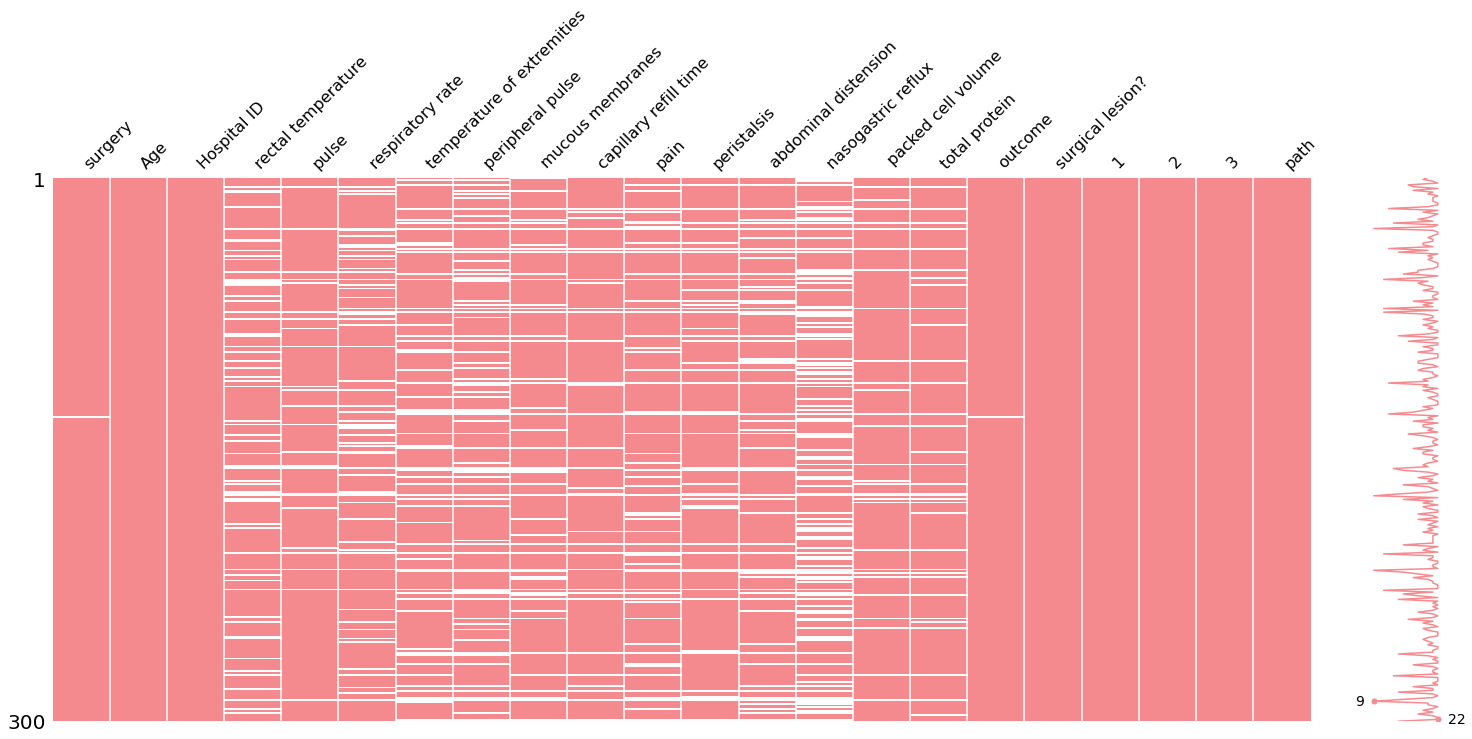

In [7]:
# Visual of Null values
msno.matrix(df, color=(0.96, 0.54, 0.56))

The dataset looks much cleaner. The rest of the `Null` values are trickier to deal with.<br><br>
The data in the columns could be either continuous or categorical. We will replace the empty values based on the data type of each column:<br><br>
* For **continuous data** we fill the empty values with the `MEAN`<br><br>
* For **categorical data** we fill the empty values with the `MODE`

In [8]:
# Continuous data
for col in df.columns.values:
    if (len(df[col].value_counts()) > 5) and (df[col].isnull().sum() > 0):
        print(f"Filling missing values for {col} with the mean.")
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)

Filling missing values for rectal temperature with the mean.
Filling missing values for pulse with the mean.
Filling missing values for respiratory rate with the mean.
Filling missing values for mucous membranes with the mean.
Filling missing values for  packed cell volume with the mean.
Filling missing values for total protein with the mean.


In [9]:
# Categorical data
for col in df.columns.values:
    if (df[col].isnull().sum() > 0):
        if (df[col].dtype == 'float64'):
            print(f"Filling missing values for {col} with the mode.")
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)

Filling missing values for surgery with the mode.
Filling missing values for temperature of extremities with the mode.
Filling missing values for peripheral pulse with the mode.
Filling missing values for capillary refill time with the mode.
Filling missing values for pain with the mode.
Filling missing values for peristalsis with the mode.
Filling missing values for abdominal distension with the mode.
Filling missing values for nasogastric reflux with the mode.
Filling missing values for outcome with the mode.


<AxesSubplot:>

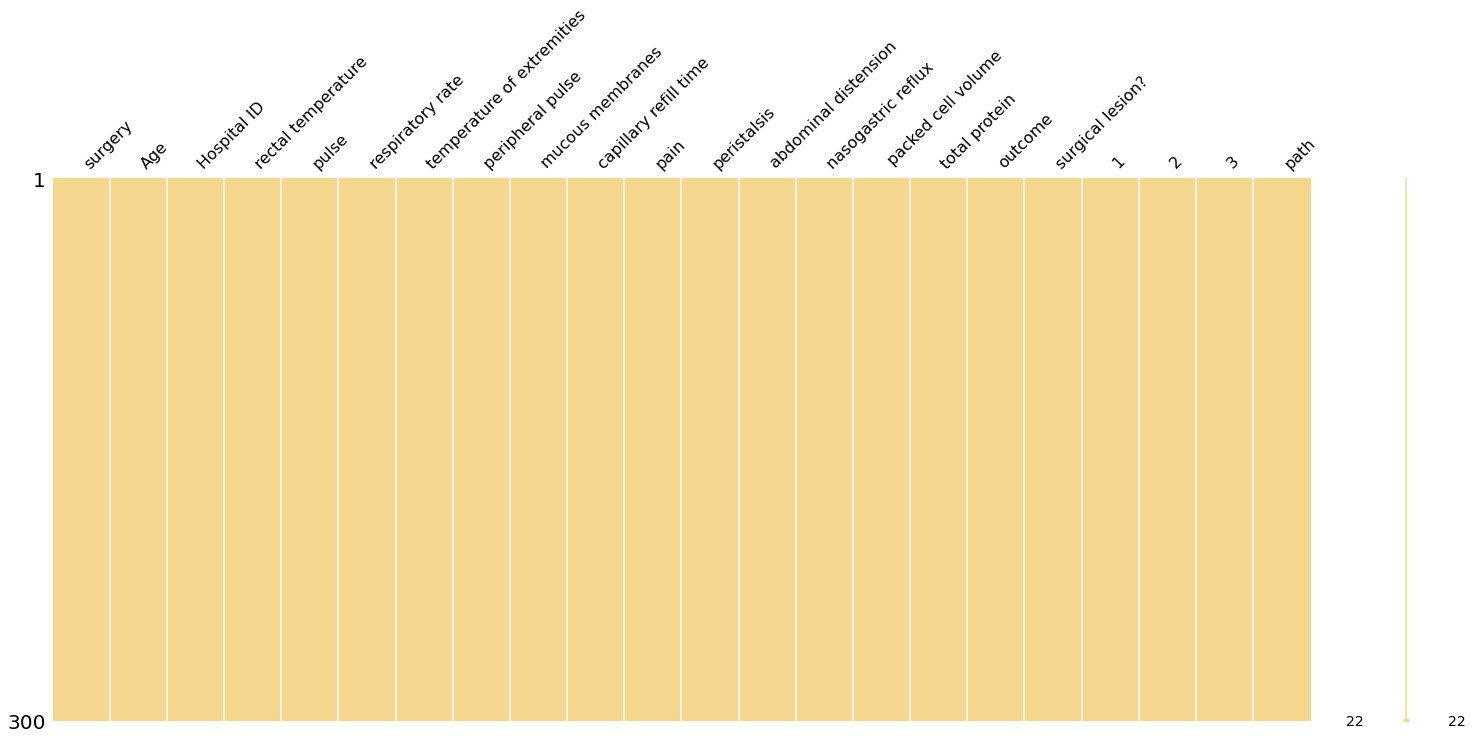

In [10]:
# No null values
msno.matrix(df, color=(0.96, 0.84, 0.56))

In [11]:
# looking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     300 non-null    float64
 1   Age                         300 non-null    int64  
 2   Hospital ID                 300 non-null    int64  
 3   rectal temperature          300 non-null    float64
 4   pulse                       300 non-null    float64
 5   respiratory rate            300 non-null    float64
 6   temperature of extremities  300 non-null    float64
 7   peripheral pulse            300 non-null    float64
 8   mucous membranes            300 non-null    float64
 9   capillary refill time       300 non-null    float64
 10  pain                        300 non-null    float64
 11  peristalsis                 300 non-null    float64
 12  abdominal distension        300 non-null    float64
 13  nasogastric reflux          300 non

**There are now no empty values in the data set.**